In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "arrow"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,9937
2021-03,12492


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                    sum      mean        max
repo                                        
arrow       6290.194444  0.504224  24.359444
arrow-site     0.439444  0.025850   0.043333

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                               sum      mean        max
repo       workflowid                                  
arrow      5194        2415.060278  2.449351  24.359444
           5196        1145.636944  1.521430   3.067222
           5195         598.961111  0.731332  12.489167
           5193         489.112222  0.634387   1.517778
           5103         473.505556  0.377596   6.083333
           6537         469.010000  1.114038   2.135833
           5099         251.428889  0.317862   1.929444
           4384         175.631389  0.111654   0.703889
           20968        138.943611  2.241026   3.888889
           20546        101.770556  1.641461   2.302500
           5100           9.430278  0.134718   0.304444
           5702263        5.968611  0.003794   0.020278
           6538           5.571111  0.074281   0.209722
           4754928        4.387500  0.002649   0.006944
           732083         3.890833  0.022107   0.092222
           748931         1.276944  0.000894   0.084444
           4407           0.608611  0.121722   0.145556
arrow-site 244893         0.431389  0.035949   0.043333
           4857772        0.008056  0.001611   0.001944

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
395444,apache,arrow,699123317,11408,2021-03-29 20:16:19+00:00,2021-03-30 10:29:17+00:00,completed,failure,5194,2021-03-30 04:23:14+00:00,2021-03-30 10:29:11+00:00,True,5,87694,arrow,24.359444,2021-03
395484,apache,arrow,702213071,11444,2021-03-30 17:02:07+00:00,2021-03-31 09:27:16+00:00,completed,failure,5194,2021-03-31 03:24:26+00:00,2021-03-31 09:27:08+00:00,True,5,87620,arrow,24.338889,2021-03
395453,apache,arrow,700175170,11416,2021-03-30 04:33:06+00:00,2021-03-30 16:56:49+00:00,completed,failure,5194,2021-03-30 10:51:56+00:00,2021-03-30 16:56:43+00:00,True,5,87581,arrow,24.328056,2021-03
395071,apache,arrow,664392098,11072,2021-03-18 11:43:19+00:00,2021-03-18 22:22:30+00:00,completed,failure,5194,2021-03-18 16:10:40+00:00,2021-03-18 22:22:24+00:00,True,5,68738,arrow,19.093889,2021-03
395538,apache,arrow,705894613,11493,2021-03-31 17:58:56+00:00,2021-04-01 06:17:49+00:00,completed,failure,5194,2021-04-01 00:15:47+00:00,2021-04-01 06:17:43+00:00,True,5,68712,arrow,19.086667,2021-03
394910,apache,arrow,647435520,10928,2021-03-12 21:06:39+00:00,2021-03-13 03:07:14+00:00,completed,failure,5194,2021-03-12 21:06:53+00:00,2021-03-13 03:07:07+00:00,True,5,68675,arrow,19.076389,2021-03
395539,apache,arrow,705931210,11494,2021-03-31 18:12:40+00:00,2021-04-01 06:30:11+00:00,completed,failure,5194,2021-04-01 00:28:57+00:00,2021-04-01 06:30:04+00:00,True,5,68630,arrow,19.063889,2021-03
395540,apache,arrow,706032818,11495,2021-03-31 18:49:57+00:00,2021-04-01 06:40:53+00:00,completed,failure,5194,2021-04-01 00:39:44+00:00,2021-04-01 06:40:47+00:00,True,5,68598,arrow,19.055000,2021-03
395019,apache,arrow,659718072,11025,2021-03-17 02:59:43+00:00,2021-03-17 10:04:19+00:00,completed,failure,5194,2021-03-17 04:01:48+00:00,2021-03-17 10:04:12+00:00,True,5,68578,arrow,19.049444,2021-03
395384,apache,arrow,691288740,11354,2021-03-26 21:15:04+00:00,2021-03-27 03:15:38+00:00,completed,failure,5194,2021-03-26 21:15:17+00:00,2021-03-27 03:15:31+00:00,True,5,68567,arrow,19.046389,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
4,apache,arrow,AMD64 Conda Integration Test,1212.775556
99,apache,arrow,rhub/debian-gcc-devel:latest,926.220833
70,apache,arrow,AMD64 Windows RTools 35,878.454167
53,apache,arrow,AMD64 Ubuntu 18.04 R 3.6,846.988056
71,apache,arrow,AMD64 Windows RTools 40,711.670278
100,apache,arrow,rstudio/r-base:4.0-centos7,667.730833
35,apache,arrow,AMD64 MacOS 10.15 C++,645.466944
31,apache,arrow,"AMD64 Debian 9 Java JNI (Gandiva, Plasma, ORC,...",617.207222
44,apache,arrow,AMD64 MacOS 10.15 Python 3,515.527778
60,apache,arrow,AMD64 Windows 2019 C++,503.614167


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
4,apache,arrow,success,54803
3,apache,arrow,skipped,15508
0,apache,arrow,cancelled,10160
1,apache,arrow,failure,5914
6,apache,arrow-site,success,47
5,apache,arrow-site,failure,11
2,apache,arrow,neutral,4


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

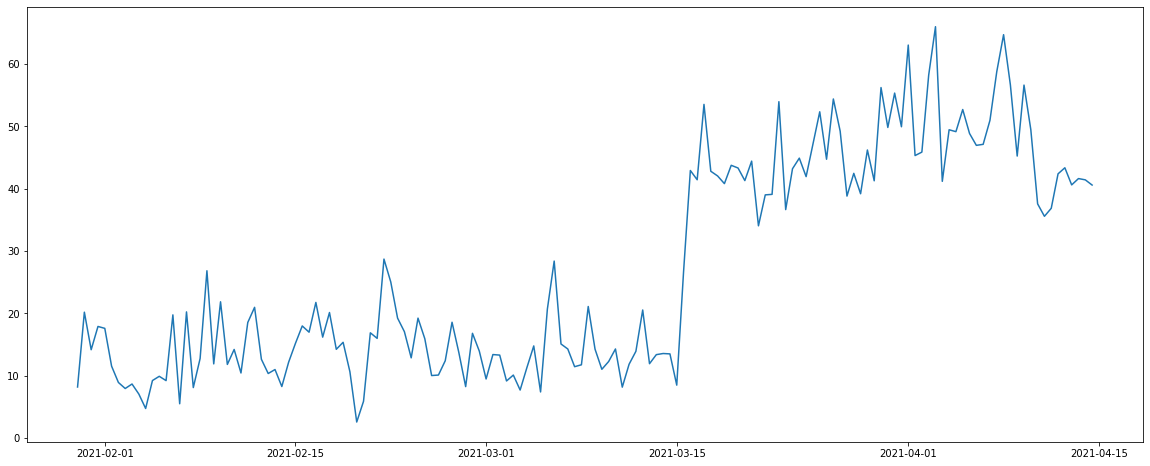

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

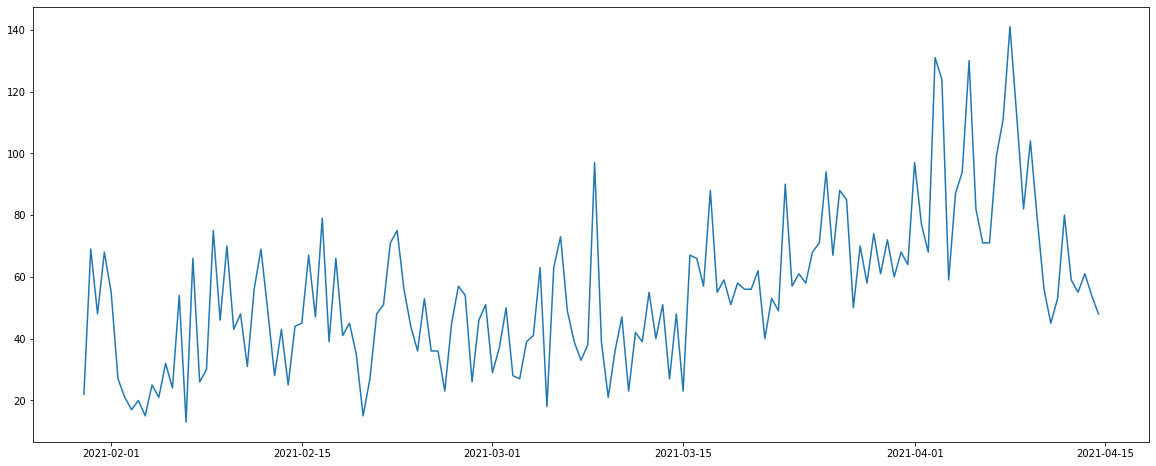

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()